https://www.kaggle.com/c/osic-pulmonary-fibrosis-progression
#  **----EDA---**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


        
folder_path = '../input/osic-pulmonary-fibrosis-progression'
train_csv = folder_path + '/train.csv'
test_csv = folder_path+ '/test.csv'
sample_csv = folder_path + '/sample_submission.csv'

In [2]:
train = pd.read_csv(train_csv)
test = pd.read_csv(test_csv)
sample = pd.read_csv(sample_csv)

In [3]:
train.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


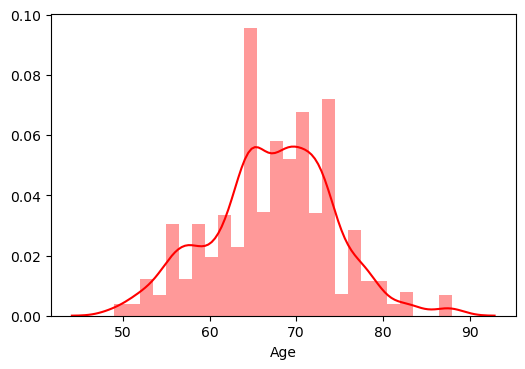

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(dpi=100)
sns.distplot(train['Age'],color='red');


In [20]:
print('Mean of Age is ≈', int(train['Age'].mean()))
print('Standard Deviation of Age is', train['Age'].std())

print('Max value of Age is', train['Age'].max())
print('Min value of Age is', train['Age'].min())

Mean of Age is ≈ 67
Standard Deviation of Age is 7.057394616249349
Max value of Age is 88
Min value of Age is 49


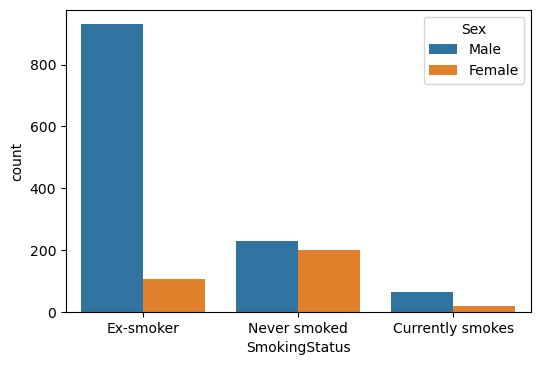

In [22]:
plt.figure(dpi=100)
sns.countplot(data=train,x='SmokingStatus',hue='Sex');

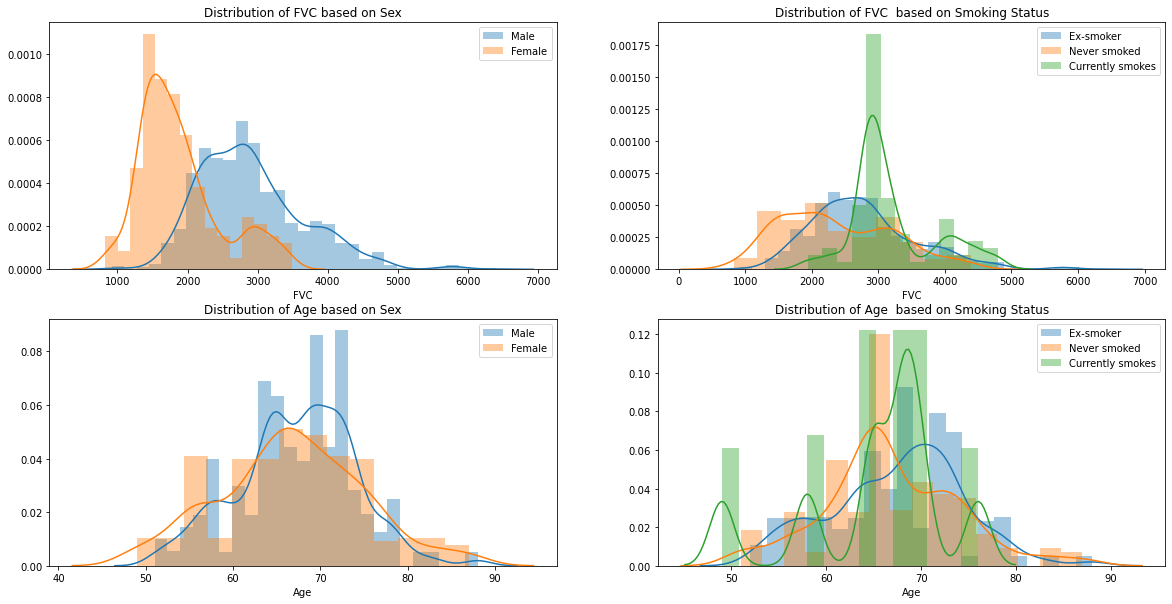

In [37]:
plt.figure(figsize=(20,10))
plt.subplot(221)
for i in train.Sex.unique():
    sns.distplot(train[train['Sex']==i]['FVC'],label=i);
plt.title(f"Distribution of {'FVC'} based on Sex");
plt.legend();

plt.subplot(222)
for i in train.SmokingStatus.unique():
    sns.distplot(train[train['SmokingStatus']==i]['FVC'],label=i);
plt.title(f"Distribution of {'FVC'}  based on Smoking Status");
plt.legend();

plt.subplot(223)
for i in train.Sex.unique():
    sns.distplot(train[train['Sex']==i]['Age'],label=i);
plt.title(f"Distribution of {'Age'} based on Sex");
plt.legend();

plt.subplot(224)
for i in train.SmokingStatus.unique():
    sns.distplot(train[train['SmokingStatus']==i]['Age'],label=i);
plt.title(f"Distribution of {'Age'}  based on Smoking Status");
plt.legend();


In [39]:
import plotly.express as px
fig = px.scatter(train,'FVC','Percent','SmokingStatus')
fig.show()

In [40]:
fig = px.box(train,'Percent','Sex','SmokingStatus')
fig.show()

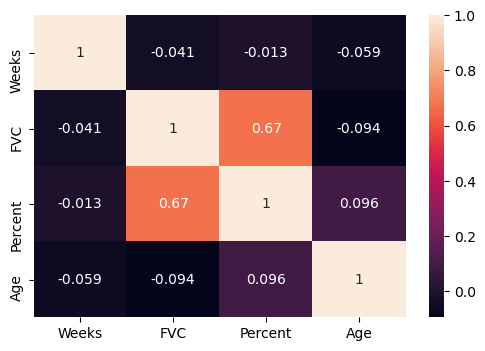

In [41]:
plt.figure(dpi=100)
sns.heatmap(train.corr(),annot=True);

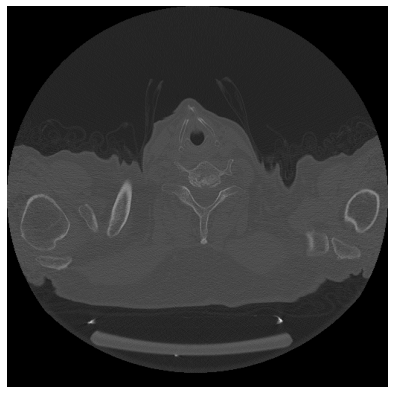

In [45]:
train_image_path = folder_path + '/train/'
test_image_path = folder_path + '/test/'

train_images = os.listdir(train_image_path)
test_images = os.listdir(test_image_path)

image = train_image_path+train_images[0]+"/1.dcm"

import pydicom

def show_image(image):
    
    image = pydicom.dcmread(image)
    image = image.pixel_array    
    plt.figure(figsize=(7,7))
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    plt.show()

show_image(image)

In [48]:
import torch

class Model(torch.nn.Module):
    def __init__(self,n):
        super(Model,self).__init__()
        self.layer1 = torch.nn.Linear(n,200)
        self.layer2 = torch.nn.Linear(200,100)
        
        self.out1 = torch.nn.Linear(100,3)
        self.relu3 = torch.nn.ReLU()
        self.out2 = torch.nn.Linear(100,3)
            
    def forward(self,xb):
        x1 =  F.leaky_relu(self.layer1(xb))
        x1 =  F.leaky_relu(self.layer2(x1))
        
        o1 = self.out1(x1)
        o2 = F.relu(self.out2(x1))
        return o1 + torch.cumsum(o2,dim=1)